<a href="https://colab.research.google.com/github/chauhanavneesh09/CODSOFT/blob/main/CodSoft_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 : TITANIC SURVIVAL PREDICTION**
*   Use the Titanic dataset to build a model that predicts whether a
    passenger on the Titanic survived or not. This is a classic beginner
    project with readily available data.
*   The dataset typically used for this project contains information
    about individual passengers, such as their age, gender, ticket
    class, fare, cabin, and whether or not they survived.



**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Titanic dataset**

In [ ]:
path = "/content/drive/MyDrive/Codsoft_Task  Datasets/Titanic.csv"
data = pd.read_csv(path)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Data Preprocessing**

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [ ]:
Embarked = data['Embarked'].unique()
for Embarkeds in Embarked:
  print("->",Embarkeds)

-> Q
-> S
-> C


In [ ]:
data['Embarked'] = data['Embarked'].map({'Q':0,'S':1,'C':2}).astype(int)
data['Sex'] = data['Sex'].map({'male':0,'female':1}).astype(int)
data['Age'] = data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(int)
data1 = data.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


**Splitting the data into Features and Target**

In [ ]:
Train = data.drop(['Survived'], axis=1)
Test = data.iloc[:,1]
x_train, x_test,y_train,y_test = train_test_split(Train,Test,test_size = 0.2, random_state = 1)

**Initialize and train various Machine Learning Models**

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear',max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy1 = accuracy*100
    print(f"{model_name} Accuracy: {accuracy1:.2f}%")

Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 92.86%
K-Nearest Neighbors Accuracy: 88.10%
SVM Accuracy: 72.62%
Decision Tree Classifier Accuracy: 100.00%


**Data Visualization**

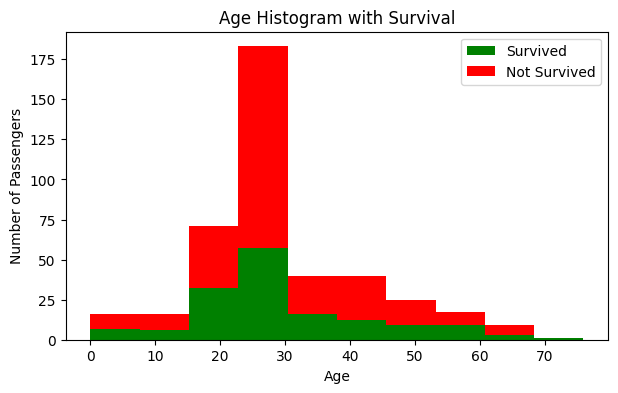

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.hist(x = [data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked = True, color = ['g','r'], label=['Survived','Not Survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

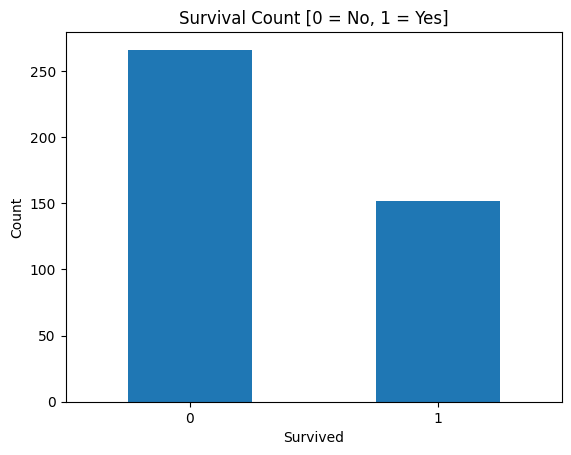

In [ ]:
column = 'Survived'
survival_counts = data[column].value_counts()
survival_counts.plot(kind = 'bar', rot = 0)
plt.title('Survival Count [0 = No, 1 = Yes]')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()